Cross validation on image block

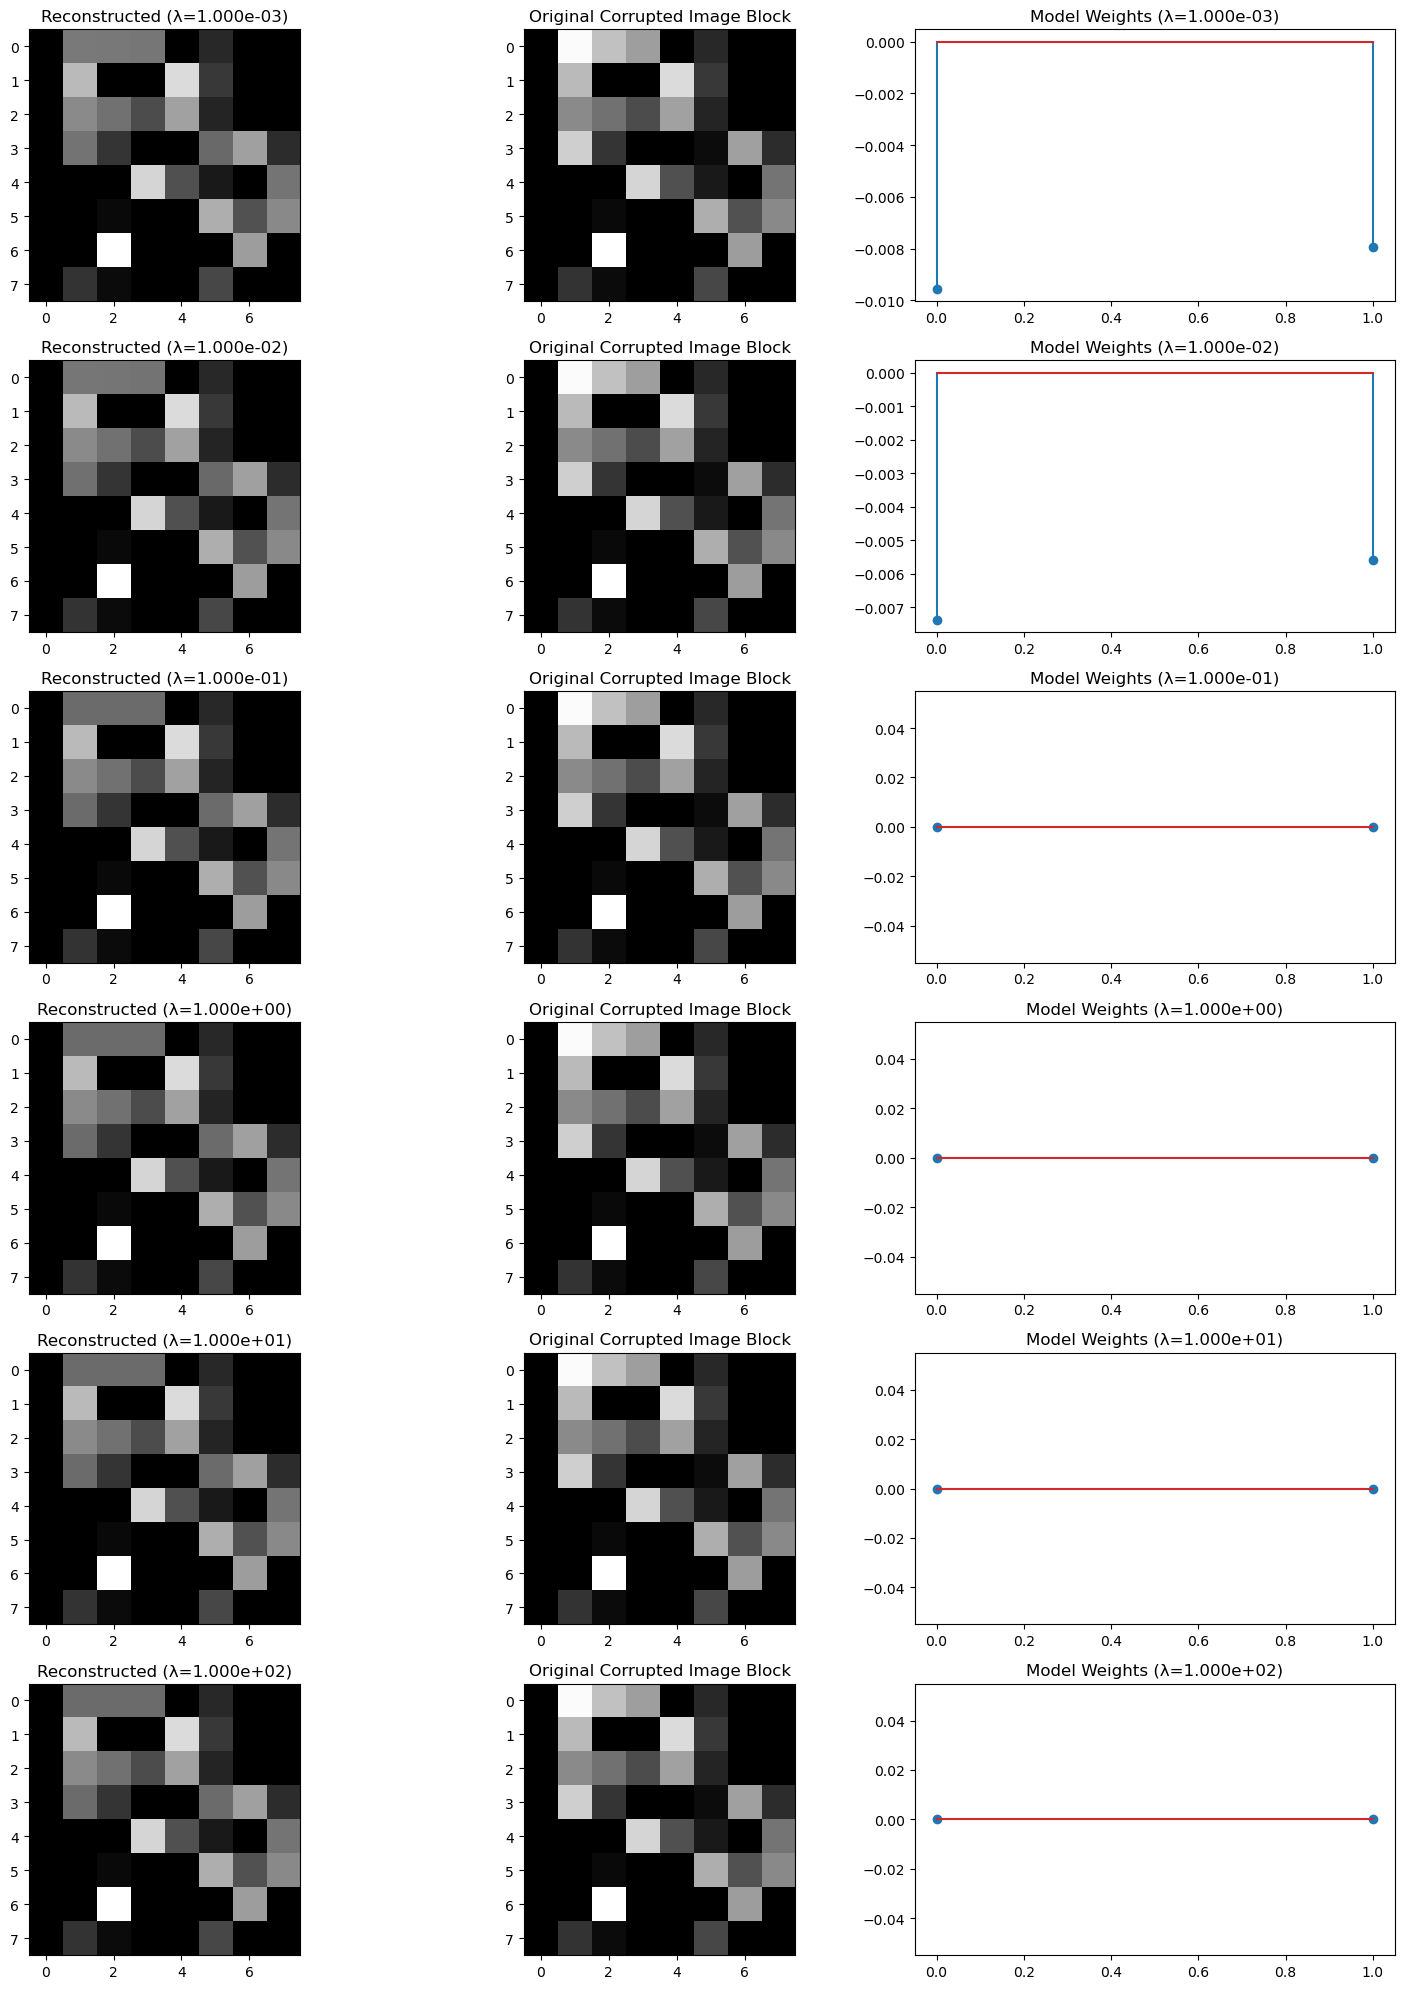

In [14]:
#3(a)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Parameters
K = 8  # Image block size (KxK)
S = 30  # Number of sensed pixels
m = S // 6  # Validation pixels per iteration
M = 20  # Number of random subsets
lambdas = np.logspace(-3, 2, 6)  # 6 log-spaced values over 6 decades

# Generate a synthetic corrupted image block (KxK)
original_block = np.random.rand(K, K)  # Simulated true image block

# Randomly select S sensed pixels
sensed_indices = np.random.choice(K*K, S, replace=False)
sensed_pixels = np.zeros((K, K))
sensed_pixels.flat[sensed_indices] = original_block.flat[sensed_indices]

# Pick the first random subset for validation
validation_indices = np.random.choice(sensed_indices, m, replace=False)
training_indices = np.setdiff1d(sensed_indices, validation_indices)

# Prepare training and validation sets
X_train = np.array([np.unravel_index(i, (K, K)) for i in training_indices])  # Pixel positions
y_train = original_block.flat[training_indices]  # Pixel values

X_val = np.array([np.unravel_index(i, (K, K)) for i in validation_indices])
y_val = original_block.flat[validation_indices]

# Store results
reconstructed_blocks = []
errors = []
model_weights = []

# Apply LASSO regression for each lambda
for lambda_val in lambdas:
    lasso = Lasso(alpha=lambda_val)
    lasso.fit(X_train, y_train)  # Train model
    
    # Predict on validation set
    y_pred = lasso.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    errors.append(error)
    
    # Reconstruct sensed image block
    reconstructed_block = np.zeros((K, K))
    reconstructed_block.flat[training_indices] = y_train  # Training pixels remain the same
    reconstructed_block.flat[validation_indices] = y_pred  # Predicted values for validation set
    reconstructed_blocks.append(reconstructed_block)
    
    # Store model weights
    model_weights.append(lasso.coef_)

# Visualization: Display results for all 6 values of lambda
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

for i, lambda_val in enumerate(lambdas):
    # 1. Reconstructed sensed image block
    axes[i, 0].imshow(reconstructed_blocks[i], cmap='gray', interpolation='nearest')
    axes[i, 0].set_title(f"Reconstructed (λ={lambda_val:.3e})")
    
    # 2. Original corrupted image block
    axes[i, 1].imshow(sensed_pixels, cmap='gray', interpolation='nearest')
    axes[i, 1].set_title("Original Corrupted Image Block")
    
    # 3. Model Weights Stem Plot
    axes[i, 2].stem(model_weights[i])
    axes[i, 2].set_title(f"Model Weights (λ={lambda_val:.3e})")

plt.tight_layout()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/86/2x61dgzj3fs_czn_z963r73h0000gn/T/ipykernel_7680/2068132471.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.title("MSE vs. Regularization Parameter $\lambda$")


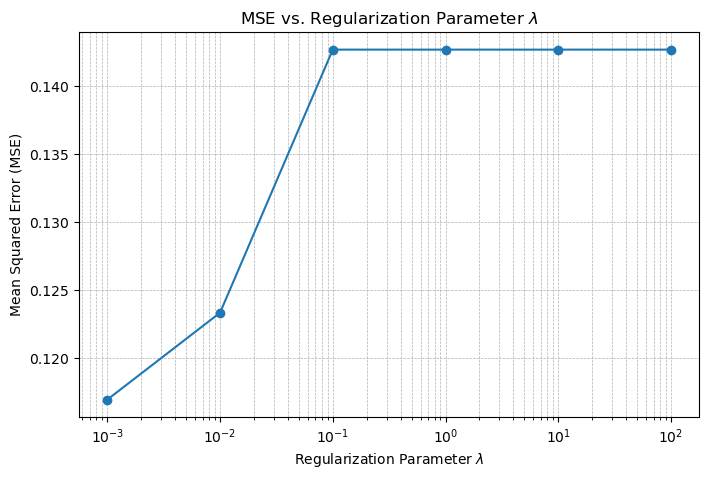

In [15]:
#3(b)
# Store MSE values
mse_values = []

# Apply LASSO regression for each lambda
for lambda_val in lambdas:
    lasso = Lasso(alpha=lambda_val)
    lasso.fit(X_train, y_train)  # Train model
    
    # Predict on validation set
    y_pred = lasso.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    mse_values.append(error)

# Plot MSE vs. Lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, mse_values, marker='o', linestyle='-')
plt.xscale("log")  # Log scale for lambda
plt.xlabel(r"Regularization Parameter $\lambda$")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Regularization Parameter $\lambda$")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
/var/folders/86/2x61dgzj3fs_czn_z963r73h0000gn/T/ipykernel_7680/522222041.py:42: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Average MSE vs. Regularization Parameter $\lambda$")


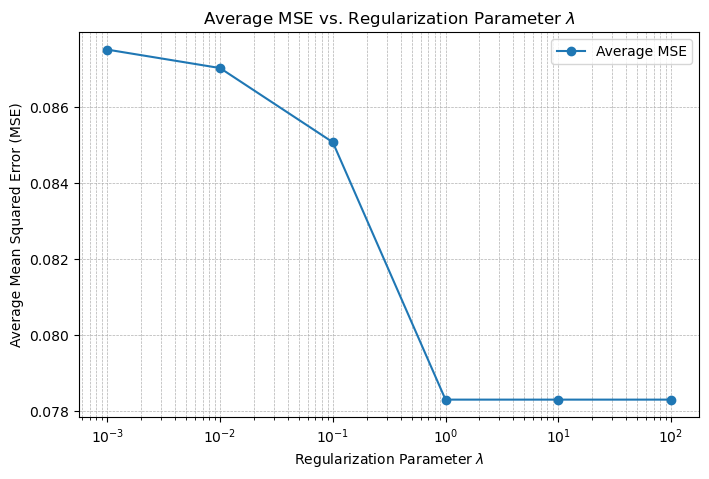

In [16]:
#3(c)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Store MSE results for all subsets
mse_matrix = np.zeros((M, len(lambdas)))

# Repeat process for M subsets
for subset in range(M):
    # Select a new random validation subset
    validation_indices = np.random.choice(sensed_indices, m, replace=False)
    training_indices = np.setdiff1d(sensed_indices, validation_indices)

    # Prepare training and validation sets
    X_train = np.array([np.unravel_index(i, (K, K)) for i in training_indices])  # Pixel positions
    y_train = original_block.flat[training_indices]  # Pixel values

    X_val = np.array([np.unravel_index(i, (K, K)) for i in validation_indices])
    y_val = original_block.flat[validation_indices]

    # Apply LASSO regression for each lambda
    for i, lambda_val in enumerate(lambdas):
        lasso = Lasso(alpha=lambda_val)
        lasso.fit(X_train, y_train)  # Train model
        
        # Predict on validation set
        y_pred = lasso.predict(X_val)
        error = mean_squared_error(y_val, y_pred)
        mse_matrix[subset, i] = error

# Compute the average MSE across M subsets
avg_mse = np.mean(mse_matrix, axis=0)

# Plot the average MSE vs. lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, avg_mse, marker='o', linestyle='-', label="Average MSE")
plt.xscale("log")  # Log scale for lambda
plt.xlabel(r"Regularization Parameter $\lambda$")
plt.ylabel("Average Mean Squared Error (MSE)")
plt.title("Average MSE vs. Regularization Parameter $\lambda$")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

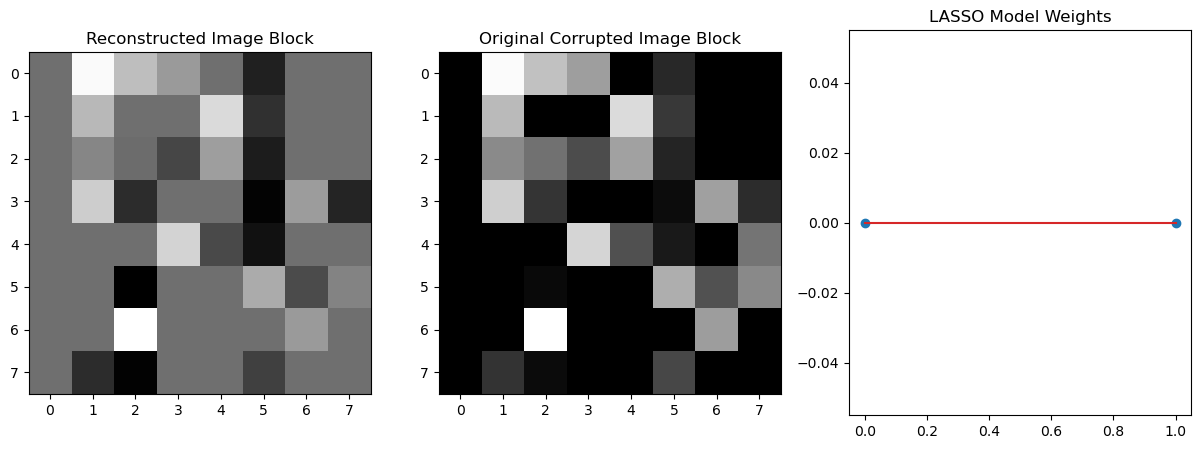

In [17]:
#3(d)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Use the best lambda from previous cross-validation
best_lambda = lambdas[np.argmin(np.mean(mse_matrix, axis=0))]

# Identify missing pixel indices (K^2 - S unknown pixels)
missing_indices = np.setdiff1d(np.arange(K*K), sensed_indices)

# Prepare training set (all sensed pixels)
X_train = np.array([np.unravel_index(i, (K, K)) for i in sensed_indices])  # Pixel positions
y_train = original_block.flat[sensed_indices]  # Pixel values

# Prepare test set (all missing pixels)
X_test = np.array([np.unravel_index(i, (K, K)) for i in missing_indices])

# Train LASSO with the best lambda
lasso = Lasso(alpha=best_lambda)
lasso.fit(X_train, y_train)

# Predict missing pixels
y_pred = lasso.predict(X_test)

# Reconstruct full image block
reconstructed_block = np.copy(sensed_pixels)
reconstructed_block.flat[missing_indices] = y_pred  # Fill in missing pixels

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Reconstructed image block
axes[0].imshow(reconstructed_block, cmap='gray', interpolation='nearest')
axes[0].set_title("Reconstructed Image Block")

# 2. Original (Corrupted) Image Block
axes[1].imshow(sensed_pixels, cmap='gray', interpolation='nearest')
axes[1].set_title("Original Corrupted Image Block")

# 3. Stem Plot of Model Weights
axes[2].stem(lasso.coef_)
axes[2].set_title("LASSO Model Weights")

plt.show()

Recorver a while image

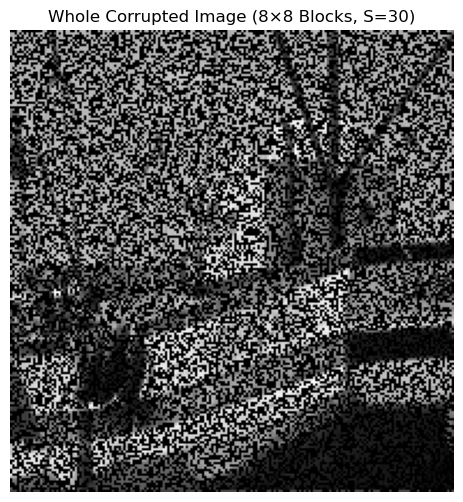

In [10]:
#4(a)
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util

# Load the "fishing_boat" image (convert to grayscale)
image = io.imread('fishing_boat.bmp', as_gray=True)
image = util.img_as_float(image)  # Normalize pixel values to [0,1]

# Get image dimensions
H, W = image.shape
block_size = 8  # 8x8 blocks
S = 30  # Number of sensed pixels per block

# Compute number of blocks in each dimension
num_blocks_H = H // block_size
num_blocks_W = W // block_size

# Initialize corrupted image
corrupted_image = np.zeros_like(image)

# Process each 8x8 block
for i in range(num_blocks_H):
    for j in range(num_blocks_W):
        # Extract the current 8x8 block
        block = image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size]
        
        # Flatten block and randomly select S sensed pixels
        flat_block = block.flatten()
        sensed_indices = np.random.choice(block_size * block_size, S, replace=False)
        
        # Create a corrupted block (only keep sensed pixels)
        corrupted_block = np.zeros_like(flat_block)
        corrupted_block[sensed_indices] = flat_block[sensed_indices]
        corrupted_block = corrupted_block.reshape(block_size, block_size)

        # Insert the corrupted block into the full image
        corrupted_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = corrupted_block

# Display the whole corrupted image
plt.figure(figsize=(10, 6))
plt.imshow(corrupted_image, cmap='gray')
plt.title("Whole Corrupted Image (8×8 Blocks, S=30)")
plt.axis("off")
plt.show()

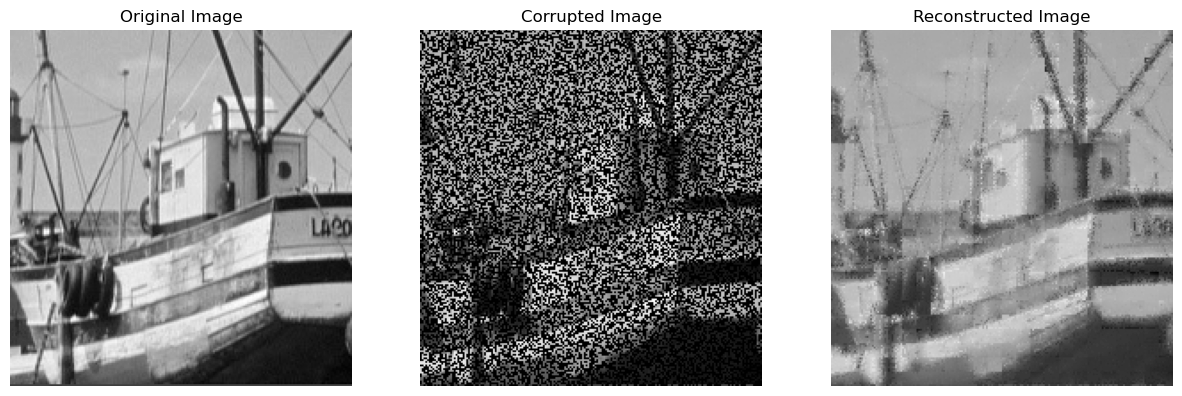

In [12]:
#4(b)
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Image and block parameters
H, W = image.shape
block_size = 8  # 8x8 blocks
S = 30  # Number of sensed pixels per block
m = S // 6  # Validation pixels per iteration
M = 20  # Number of cross-validation subsets
lambdas = np.logspace(-4, 3, 8)  # 8 log-spaced values for lambda

# Compute number of blocks in each dimension
num_blocks_H = H // block_size
num_blocks_W = W // block_size

# Initialize images
corrupted_image = np.zeros_like(image)
reconstructed_image = np.zeros_like(image)

# Process each 8x8 block independently
for i in range(num_blocks_H):
    for j in range(num_blocks_W):
        # Extract the current 8x8 block
        block = image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size]
        
        # Flatten block and randomly select S sensed pixels
        flat_block = block.flatten()
        sensed_indices = np.random.choice(block_size * block_size, S, replace=False)
        
        # Create a corrupted block (only keep sensed pixels)
        corrupted_block = np.zeros_like(flat_block)
        corrupted_block[sensed_indices] = flat_block[sensed_indices]
        corrupted_block = corrupted_block.reshape(block_size, block_size)
        
        # Insert corrupted block into the full corrupted image
        corrupted_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = corrupted_block

        # Perform Cross-Validation to find the best lambda
        mse_matrix = np.zeros((M, len(lambdas)))

        for subset in range(M):
            # Select a new random validation subset
            validation_indices = np.random.choice(sensed_indices, m, replace=False)
            training_indices = np.setdiff1d(sensed_indices, validation_indices)

            # Prepare training and validation sets
            X_train = np.array([np.unravel_index(i, (block_size, block_size)) for i in training_indices])
            y_train = flat_block[training_indices]
            X_val = np.array([np.unravel_index(i, (block_size, block_size)) for i in validation_indices])
            y_val = flat_block[validation_indices]

            # Apply LASSO regression for each lambda
            for idx, lambda_val in enumerate(lambdas):
                lasso = Lasso(alpha=lambda_val)
                lasso.fit(X_train, y_train)

                # Predict on validation set
                y_pred = lasso.predict(X_val)
                error = mean_squared_error(y_val, y_pred)
                mse_matrix[subset, idx] = error

        # Select best lambda based on lowest average MSE
        best_lambda = lambdas[np.argmin(np.mean(mse_matrix, axis=0))]

        # Identify missing pixel indices
        missing_indices = np.setdiff1d(np.arange(block_size * block_size), sensed_indices)

        # Train LASSO on all sensed pixels
        X_train_full = np.array([np.unravel_index(i, (block_size, block_size)) for i in sensed_indices])
        y_train_full = flat_block[sensed_indices]

        lasso_final = Lasso(alpha=best_lambda)
        lasso_final.fit(X_train_full, y_train_full)

        # Predict missing pixels
        X_test = np.array([np.unravel_index(i, (block_size, block_size)) for i in missing_indices])
        y_pred = lasso_final.predict(X_test)

        # Reconstruct full block
        reconstructed_block = np.copy(corrupted_block.flatten())
        reconstructed_block[missing_indices] = y_pred
        reconstructed_block = reconstructed_block.reshape(block_size, block_size)

        # Insert reconstructed block into the full image
        reconstructed_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = reconstructed_block

# Display the original, corrupted, and reconstructed images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# 2. Corrupted Image
axes[1].imshow(corrupted_image, cmap='gray')
axes[1].set_title("Corrupted Image")
axes[1].axis("off")

# 3. Reconstructed Image
axes[2].imshow(reconstructed_image, cmap='gray')
axes[2].set_title("Reconstructed Image")
axes[2].axis("off")

plt.show()

In [13]:
#4(c)
from sklearn.metrics import mean_squared_error

def calculate_image_mse(original_image, reconstructed_image):
    """
    Compute the Mean Squared Error (MSE) between the original and reconstructed whole images.

    Parameters:
        original_image (numpy.ndarray): The original image (H x W).
        reconstructed_image (numpy.ndarray): The reconstructed image (H x W).

    Returns:
        float: The computed MSE value.
    """
    mse = mean_squared_error(original_image.flatten(), reconstructed_image.flatten())
    return mse

# Compute MSE for the whole image
mse_whole_image = calculate_image_mse(image, reconstructed_image)
print(f"Mean Squared Error (MSE) for the whole reconstructed image: {mse_whole_image:.6f}")

Mean Squared Error (MSE) for the whole reconstructed image: 0.005261
